### Data Research: CoinMarketCap
Research and data analysis using the CoinMarketCap API to obtain different metrics of the best valued cryptocurrencies on the market.

Documentation: https://coinmarketcap.com/api/documentation/v1/

In [226]:
from requests import  Session
from dotenv import load_dotenv
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#take enviroment variables from .env file.
load_dotenv()
CMC_PRO_API_KEY = os.getenv('api')

base_url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
params = {
  'start':'1',
  'limit': '10',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': CMC_PRO_API_KEY,
}

session = Session()
session.headers.update(headers)
response = session.get(base_url, params=params, headers=headers)

#Data Searcher function
def dataSearcher(data, response, *args):
    if response.status_code == 200:
        user_input = input("Enter the crypto names separated by commas: ")
        crypto_symbols = [symbol.strip() for symbol in user_input.split(',')]
        for crypto_symbol in crypto_symbols:
            found = False
            for cryptocurrency in data["data"]:
                if cryptocurrency["symbol"] == crypto_symbol:
                    found = True
                    output_str = ""
                    for arg in args:
                        if arg == "name":
                            output_str += f"{cryptocurrency['name']} "
                        elif arg == "symbol":
                            output_str += f"({cryptocurrency['symbol']}) "
                        elif arg == "cmc_rank":
                            output_str += f"#{cryptocurrency['cmc_rank']}. "
                        elif arg == "price":
                            price = cryptocurrency['quote']['USD']['price']
                            # Formatted price for 2 decimal places
                            formatted_price = "{:.2f}".format(float(price))
                            output_str += f"Price: ${formatted_price} "
                        elif arg == "market_cap":
                            output_str += f"\nMarket Cap: {cryptocurrency['quote']['USD']['market_cap']} "
                        elif arg == "volume_24h":
                            output_str += f"\nVolume 24h: {cryptocurrency['quote']['USD']['volume_24h']} "
                        elif arg == "percent_change_24h":
                            output_str += f"\nPercent Change 24h: {cryptocurrency['quote']['USD']['percent_change_24h']} "
                    print(output_str, end="\n --------------------------------------\n")
                    break
            if not found:
                print(f"No cryptocurrency found with the symbol: '{crypto_symbol}'")
    else:
        print("Status Error")

#Data Visualizer function
def dataVisualizer(data, response, *args):
    if response.status_code == 200:
        cryptocurrency_data = [] # List to store crypto data
        user_input = input("Enter the crypto symbols separated by commas: ")
        crypto_symbols = [symbol.strip() for symbol in user_input.split(',')]
        for crypto_symbol in crypto_symbols:
            found = False
            for cryptocurrency in data["data"]:
                if cryptocurrency['symbol'] == crypto_symbol:
                    found = True
                    output_data = {} # Dict to store crypto data
                    for arg in args:
                        if arg == "name":
                            output_data["Name"] = cryptocurrency['name']
                        elif arg == "symbol":
                            output_data["Symbol"] = cryptocurrency['symbol']
                        elif arg == "cmc_rank":
                            output_data["CMC Rank"] = cryptocurrency['cmc_rank']
                        elif arg == "price":
                            price = cryptocurrency['quote']['USD']['price']
                            formatted_price = float("{:.2f}".format(float(price)))
                            output_data["Price"] = formatted_price
                        elif arg == "market_cap":
                            output_data["Market Cap"] = cryptocurrency['quote']['USD']['market_cap']
                        elif arg == "volume_24h":
                            output_data["Volume 24h"] = cryptocurrency['quote']['USD']['volume_24h']
                        elif arg == "percent_change_24h":
                            output_data["Percent Change 24h"] = cryptocurrency['quote']['USD']["percent_change_24h"]
                        elif arg == "percent_change_7d":
                            output_data["Percent Change 7 Days"] = cryptocurrency['quote']['USD']["percent_change_7d"]
                    cryptocurrency_data.append(output_data) # Agregamos los datos de la criptomoneda al diccionario
            if not found:
                print(f"No cryptocurrency found with the symbol: '{crypto_symbol}'")
        
        # Create a DataFrame using pandas after procesing all cryptocurrecy symbols
        cryptocurrency_df = pd.DataFrame(cryptocurrency_data)
        return cryptocurrency_df
    else:
        print("Status Error")



### Cryptocurrency Rank

In [233]:
dataSearcher(data, response, "cmc_rank", "name", "symbol")

No cryptocurrency found with the symbol: 'ADA'


### Market Capitalization, Negotiation Volume an Price Changes in last 24h.


In [199]:
dataSearcher(data, response, "name", "symbol", "price", "market_cap", "percent_change_24h")

Ethereum (ETH) Price: $2508.40 
Market Cap: 301439436766.8043 
Percent Change 24h: 0.47389799 
 --------------------------------------
Tether USDt (USDT) Price: $1.00 
Market Cap: 96378546862.16599 
Percent Change 24h: -0.01346039 
 --------------------------------------


### Market Capitalization and Percent Change in the last 7 Days

<Axes: xlabel='Percent Change 7 Days', ylabel='Market Cap'>

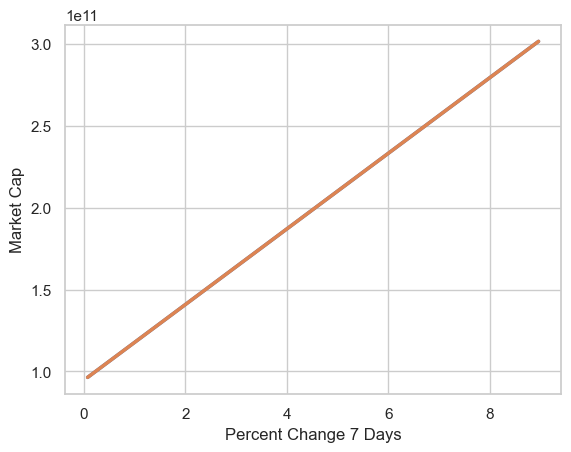

In [230]:
sns.set_theme(style="whitegrid")

crypto_df = dataVisualizer(data, response, "name", "symbol", "market_cap", "percent_change_7d")

# Convertir las columnas "Percent Change 7 Days" y "Market Cap" a tipos numéricos
crypto_df["Percent Change 7 Days"] = pd.to_numeric(crypto_df["Percent Change 7 Days"], errors="coerce")
crypto_df["Market Cap"] = pd.to_numeric(crypto_df["Market Cap"], errors="coerce")

# Eliminar filas con valores NaN (si existen)
crypto_df = crypto_df.dropna(subset=["Percent Change 7 Days", "Market Cap"])

# Trazar el gráfico
sns.lineplot(data=crypto_df, x="Percent Change 7 Days", y="Market Cap", palette="tab10", linewidth=2.5)

sns.lineplot(data=crypto_df, x="Percent Change 7 Days", y="Market Cap", palette="tab10", linewidth=2.5)


### Cryptocurrencies Comparision

<Axes: xlabel='Name', ylabel='Price'>

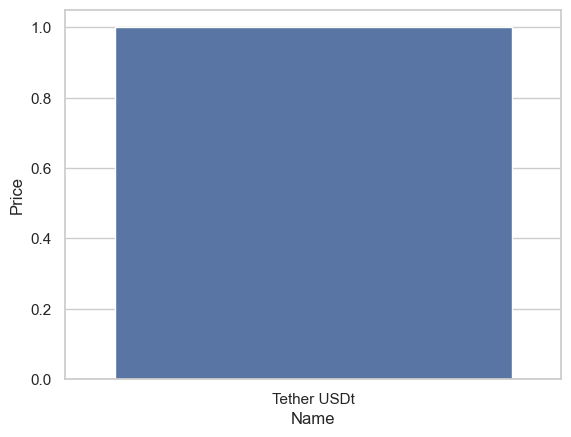

In [231]:
crypto_df = dataVisualizer(data, response, "name", "price")
sns.barplot(data=crypto_df, x="Name", y="Price")